# Exercise 3 part (c) of Round 4

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#set some variables
N = 1 # number of observation set  # try different number (e.g. N=1,10,100) to see the effect of the number of sensors on the method
sigma = 0.5 # we use the same standard deviation for all measurement
alpha = 10. 
beta = 10.
np.random.seed(2)
x = np.array([.3, .4]) # true variable
x_0 = np.array([0.25, 0.25]) # initial guess    # Change the initial guess to see its impact on the GN method
iteration_end = 20 #number of iterations
x_history = np.zeros((iteration_end, 2)) #the path of the estimation
x_history[0, :] = x_0
R = sigma * sigma * np.eye(2) # measurement variance
R_inv = np.eye(2) / (sigma*sigma)


# Measurement model and Jacobian

In [45]:
def g(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([alpha * np.sqrt(x1),
                     beta * np.sqrt(x2)])


def G(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([[alpha/(2*np.sqrt(x1)), 0],
                     [0, beta/(2*np.sqrt(x2))]])

In [46]:
def J_cost(y, x):
    #This relies on the fact that our R is a block diagonal matrix, otherwise you need to use different notation
    E = (1/sigma)*np.eye(2)
    e = (y - g(x)) @ E
    return np.sum(e**2)

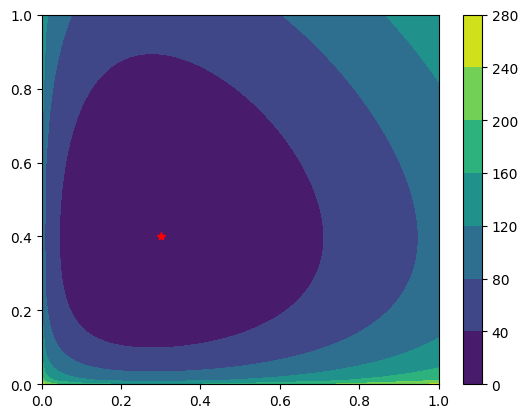

In [47]:
# simulate data
r = sigma * np.random.randn(N, 2)
y = g(x) + r
Grid_size = 100
x1s = np.linspace(0, 1, Grid_size) # creating linearly spaced values in the interval (0, 1)
x2s = np.linspace(0, 1, Grid_size)
x_grid, y_grid = np.meshgrid(x1s, x2s) # creating rectangular grid
J = np.zeros((Grid_size, Grid_size))
for i in range(x_grid.shape[0]): 
    for j in range(x_grid.shape[1]):
        cx = np.array([x_grid[i,j], y_grid[i,j]])
        J[i, j] = J_cost(y, cx)

plt.contourf(x_grid, y_grid, J) # display three-dimensional data in two dimensions using color-coded regions
plt.colorbar()
plt.plot(x[0], x[1], 'r*');

### Gauss - Newton method: $\hat{x}^{(i+1)} = \hat{x}^{(i)} + \Delta(x)|_{\hat{x}^(i)}$

$$
\Delta(x) = (\bar{\mathbf{G}}^\top \bar{\mathbf{R}}^{-1} \bar{\mathbf{G}}    )^{-1}\bar{\mathbf{G}}^\top \bar{\mathbf{R}}^{-1}(\mathbf{y} - \bar{\mathbf{g}}(\mathbf{x}))
= (\sum_i\mathbf{G}^\top \mathbf R^{-1} \mathbf G    )^{-1}\sum_i\mathbf{G}^\top \mathbf{R}^{-1}(\mathbf{y}_i - \mathbf{g}(\mathbf{x}))
$$
Which equals to
$$
\Delta(x) = (\mathbf{G}^\top \mathbf R^{-1} \mathbf{G})^{-1}\dfrac{1}{N}\sum_i\mathbf{G}^\top \mathbf{R}^{-1}(\mathbf{y}_i - \mathbf{g}_i(\mathbf{x}))
$$

In [48]:
# Gauss Newton method
for j in range(iteration_end - 1):
    gj = g(x_history[j, :])
    Gj = G(x_history[j, :])
    x_history[j+1, :] = x_history[j,:] \
                       + np.linalg.solve((Gj.T @ R_inv @ Gj), Gj.T @ R_inv @ np.sum(y - gj,axis=0)/N)



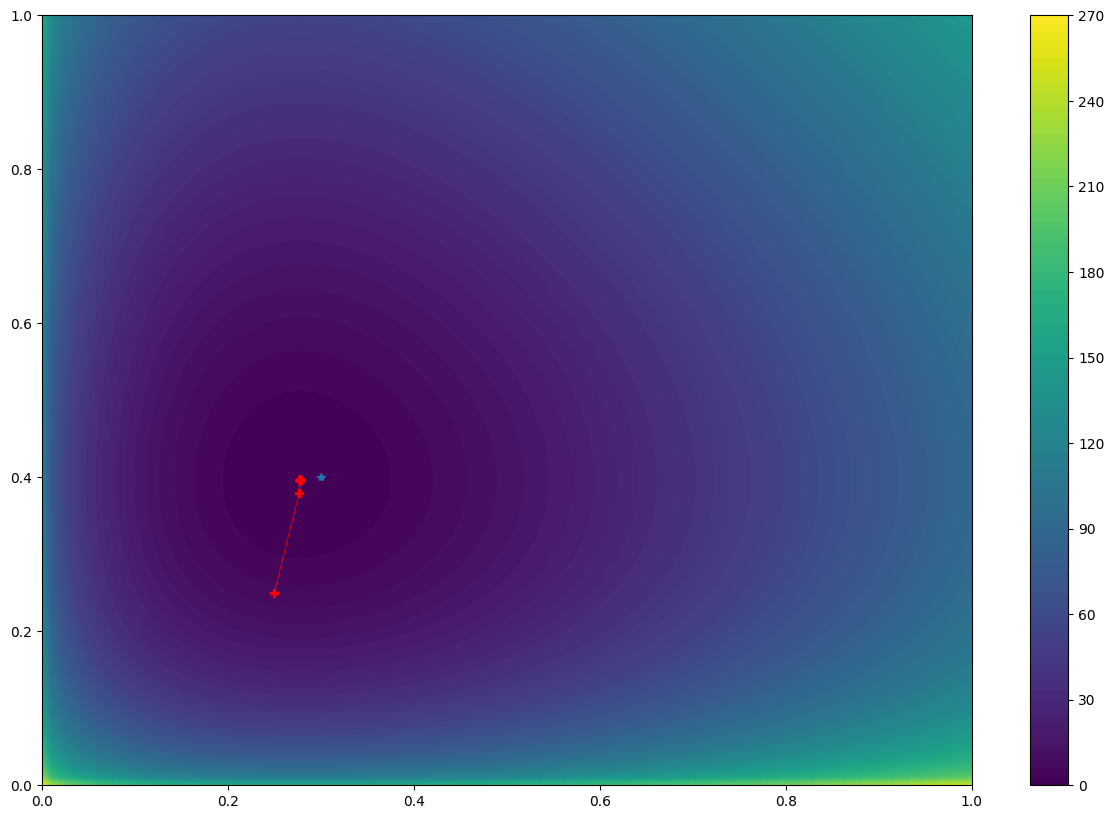

In [49]:
plt.figure(figsize=(15,10))
plt.contourf(x_grid, y_grid, J, 100)
plt.colorbar()
plt.plot(x[0], x[1],'*')
plt.plot(x_history[:, 0], x_history[:, 1], c='r', marker="P", linewidth=0.5);